In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company Stock and Investment.csv")

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1984 non-null   object 
 1   Oil Investments          1984 non-null   float64
 2   Gold Investments         1984 non-null   float64
 3   Comp Stock               1984 non-null   float64
 4   Other sharesInvestments  1984 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [5]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [6]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [7]:
df.set_index('Date', inplace=True)

In [8]:
#df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
#df.head()

In [9]:
#data = df.groupby(df['month_year'])['Oil Investments','Gold Investments','Comp Stock','Other sharesInvestments'].sum()

From the above we have converted the days data to the months data to get a proper understanding of the trend as most of the values are observed to be very close to 0.

In [10]:
#df.set_index('month_year',inplace=True)

In [11]:
df.describe()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


From the above we can see that the mean for both Oil and Gold investment are in negative, where as company stocks and other sharesinvestments are in postive and other sharesinvestment's max value is the highest then the rest.

In [12]:
oil_df=df.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1)
oil_df

,Oil Investments
Date,
2009-12-31,0.025417
2010-01-04,0.026830
2010-01-05,0.002699
2010-01-06,0.021688
2010-01-07,-0.006256
...,...
2017-11-09,0.005984
2017-11-10,-0.007173
2017-11-13,0.000352


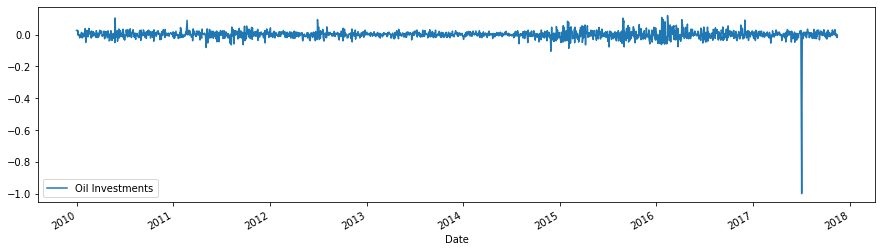

In [13]:
oil_df.plot(figsize=(15,4))

In [14]:
def adf_test(price):
    result=adfuller(price) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [15]:
adf_test(oil_df['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


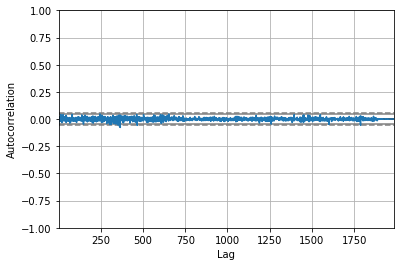

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil_df['Oil Investments']) 
plt.show()


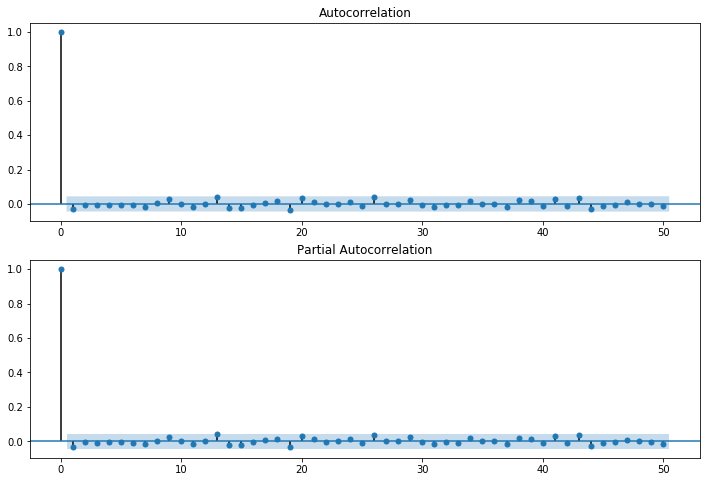

In [17]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(oil_df['Oil Investments'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(oil_df['Oil Investments'],lags=50,ax=ax2)

So from the above Auto correlation plot we can see that there is no strong evidance.

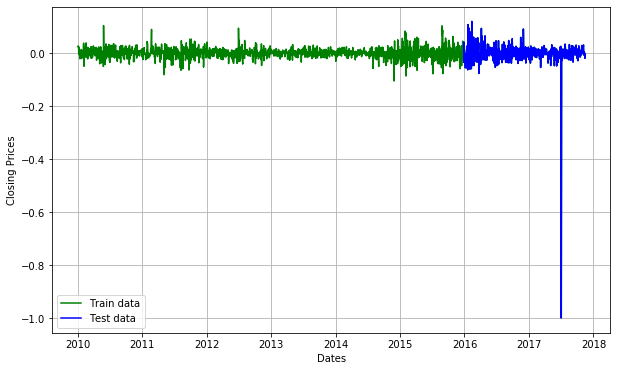

In [18]:
#oil_df  = oil_df.set_index('month_year')
size=int(len(oil_df)*0.76)
train_data, test_data = oil_df[0:size], oil_df[size:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(oil_df, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [45]:
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(train_data,order=(1,1,1)) # this order is p d q(0 or 1) 
results=model1.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1506
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3771.210
Method:                       css-mle   S.D. of innovations              0.020
Date:                Thu, 22 Oct 2020   AIC                          -7534.420
Time:                        10:29:45   BIC                          -7513.152
Sample:                             1   HQIC                         -7526.499
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.146e-06   1.11e-06     -1.938      0.053   -4.32e-06    2.43e-08
ar.L1.D.Oil Investments    -0.0557      0.026     -2.164      0.030      -0.106      -0.005
ma.L1.D.Oil Investments    -1.0000      0.002   -536.745      0.000      -1.004      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -17.9412           +0.0000j           17.9412            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

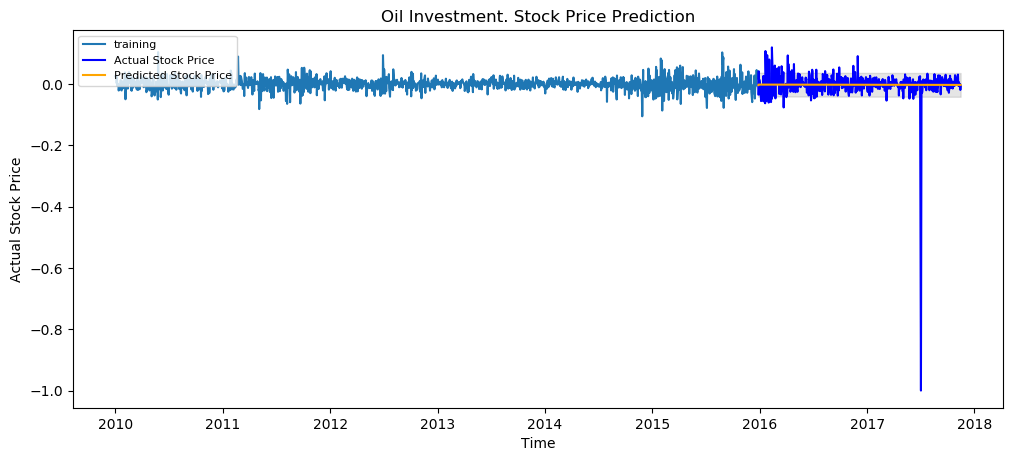

In [47]:
#Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.
fc, se, conf = results.forecast(477, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Oil Investment. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.0027258617499649907
MAE: 0.02055508708487267
RMSE: 0.052209785959769946


In [49]:
fc_series

Date
2015-12-28   -0.003322
2015-12-29   -0.001835
2015-12-30   -0.001920
2015-12-31   -0.001918
2016-01-04   -0.001920
                ...   
2017-11-09   -0.002924
2017-11-10   -0.002926
2017-11-13   -0.002928
2017-11-14   -0.002931
2017-11-15   -0.002933
Length: 477, dtype: float64

In [50]:
from pandas.tseries.offsets import DateOffset
future_dates=[oil_df.index[-1]+ DateOffset(days=x)for x in range(0,1508)]

In [51]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=oil_df.columns)

In [26]:
future_datest_df.tail()

,Oil Investments
2021-12-27,NaN
2021-12-28,NaN
2021-12-29,NaN
2021-12-30,NaN
2021-12-31,NaN


In [37]:
fc1, se1, conf1 = results.forecast(1507, alpha=0.05)  # 95% confidence
fc1_series = pd.Series(fc1, index=future_datest_df.index)

In [38]:
fc1_series

2017-11-16   -0.003322
2017-11-17   -0.001835
2017-11-18   -0.001920
2017-11-19   -0.001918
2017-11-20   -0.001920
                ...   
2021-12-27   -0.005134
2021-12-28   -0.005136
2021-12-29   -0.005138
2021-12-30   -0.005141
2021-12-31   -0.005143
Length: 1507, dtype: float64

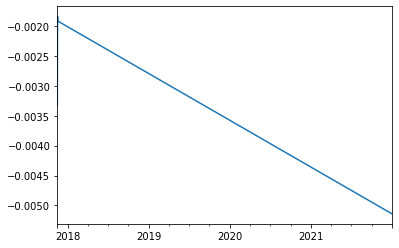

In [40]:
fc1_series.plot()

In [39]:
fc1_series.to_excel("Oil_Investment_Prediction.xlsx")

From the above we can see that for future dates the vlaues of the stocks are progressively low, so oil investment is not the best option 